In [1]:
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_data = pd.read_csv("../data/train.csv")
train_data.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [3]:
print("Dataset Shape\nRows:{0}\nColumns:{1}".format(train_data.shape[0],train_data.shape[1]))

Dataset Shape
Rows:200000
Columns:202


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 202 entries, ID_code to var_199
dtypes: float64(200), int64(1), object(1)
memory usage: 308.2+ MB


In [5]:
likely_cat = {}
for c in train_data.columns:
    likely_cat[c] = 1.*train_data[c].nunique()/train_data[c].count() < 0.005
likely_cat= pd.Series(likely_cat)
likely_cat[likely_cat==True]

target    True
var_68    True
dtype: bool

In [6]:
train_data.var_68.nunique()

451

In [7]:
train_data.describe()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,0.100490,10.679914,-1.627622,10.715192,6.796529,11.078333,-5.065317,5.408949,16.545850,0.284162,...,3.234440,7.438408,1.927839,3.331774,17.993784,-0.142088,2.303335,8.908158,15.870720,-3.326537
std,0.300653,3.040051,4.050044,2.640894,2.043319,1.623150,7.863267,0.866607,3.418076,3.332634,...,4.559922,3.023272,1.478423,3.992030,3.135162,1.429372,5.454369,0.921625,3.010945,10.438015
min,0.000000,0.408400,-15.043400,2.117100,-0.040200,5.074800,-32.562600,2.347300,5.349700,-10.505500,...,-14.093300,-2.691700,-3.814500,-11.783400,8.694400,-5.261000,-14.209600,5.960600,6.299300,-38.852800
25%,0.000000,8.453850,-4.740025,8.722475,5.254075,9.883175,-11.200350,4.767700,13.943800,-2.317800,...,-0.058825,5.157400,0.889775,0.584600,15.629800,-1.170700,-1.946925,8.252800,13.829700,-11.208475
50%,0.000000,10.524750,-1.608050,10.580000,6.825000,11.108250,-4.833150,5.385100,16.456800,0.393700,...,3.203600,7.347750,1.901300,3.396350,17.957950,-0.172700,2.408900,8.888200,15.934050,-2.819550
75%,0.000000,12.758200,1.358625,12.516700,8.324100,12.261125,0.924800,6.003000,19.102900,2.937900,...,6.406200,9.512525,2.949500,6.205800,20.396525,0.829600,6.556725,9.593300,18.064725,4.836800
max,1.000000,20.315000,10.376800,19.353000,13.188300,16.671400,17.251600,8.447700,27.691800,10.151300,...,18.440900,16.716500,8.402400,18.281800,27.928800,4.272900,18.321500,12.000400,26.079100,28.500700


In [8]:
train_data_dist = pd.DataFrame(train_data.iloc[:,2:].max(axis=0),columns=["Max_value"])
train_data_dist['Min_value'] = train_data.iloc[:,2:].min(axis=0)
train_data_dist['Median_value'] = train_data.iloc[:,2:].median(axis=0)
train_data_dist.head()

,Max_value,Min_value,Median_value
var_0,20.3150,0.4084,10.52475
var_1,10.3768,-15.0434,-1.60805
var_2,19.3530,2.1171,10.58000
var_3,13.1883,-0.0402,6.82500
var_4,16.6714,5.0748,11.10825


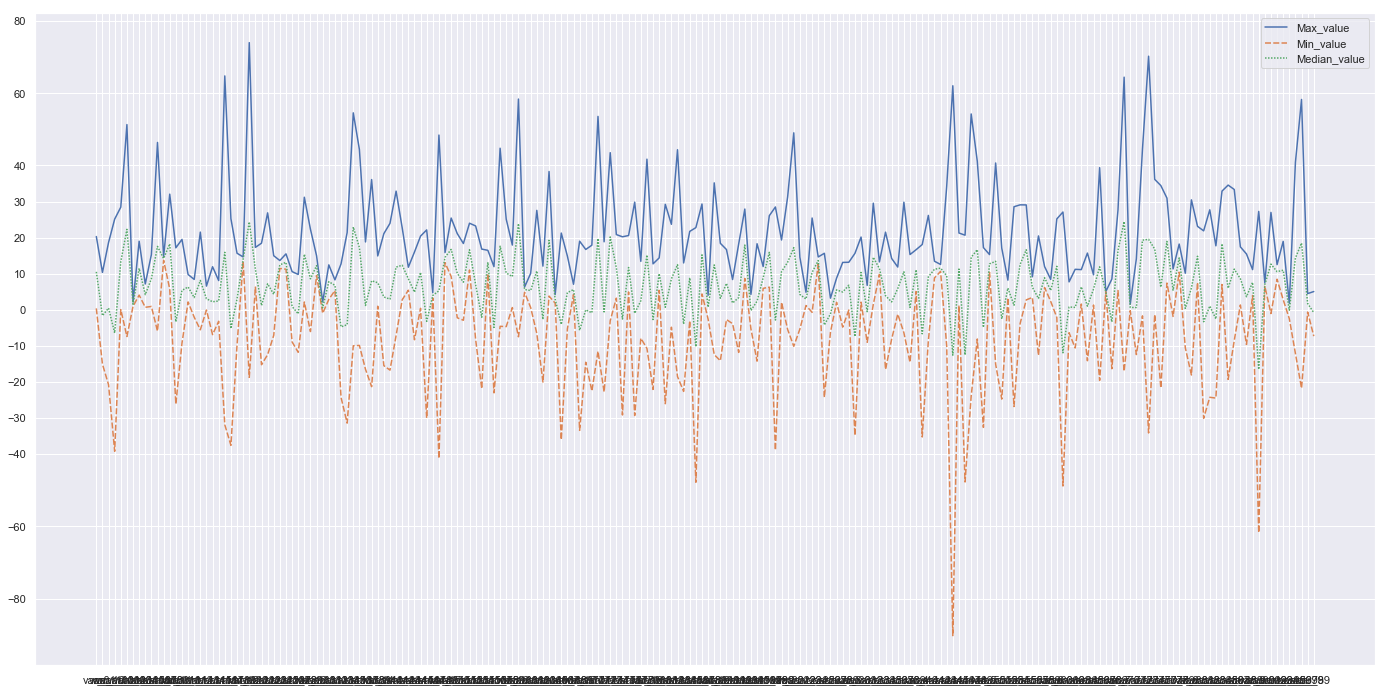

In [9]:
sns.set(rc={'figure.figsize':(24,12)})
line=sns.lineplot(data=train_data_dist)
line= line.set(yticks=[-80,-60,-40,-30,-20,-10,0,10,20,30,40,60,80])
#seaborn 0.9.0 required for this plot

In [10]:
colzerototen= [c for c in train_data.iloc[:,2:].columns if (train_data.loc[:,c].min() >=0) & (train_data.loc[:,c].max()< 10) ]
print('Number of features with positive values and maximum value less than 10 :',len(colzerototen))
colzerototwenty= [c for c in train_data.iloc[:,2:].columns if (train_data.loc[:,c].min() >=0) & (train_data.loc[:,c].max() >= 10) & (train_data.loc[:,c].max() < 20)  ]
print('Number of features with positive values maximum value between 10 & 20 :',len(colzerototwenty))
colzeroandtwentyplus= [c for c in train_data.iloc[:,2:].columns if (train_data.loc[:,c].min() >=0) & (train_data.loc[:,c].max() >= 20)]
print('Number of features with positive values maximum value > 20 :',len(colzeroandtwentyplus))
colzerominus= [c for c in train_data.iloc[:,2:].columns if train_data.loc[:,c].max() <0 ]
print('Number of features with only negative values :',len(colzerominus))
colplustenminusten= [c for c in train_data.iloc[:,2:].columns if (train_data.loc[:,c].max() <= 10) & (train_data.loc[:,c].min() >=-10 )& (train_data.loc[:,c].min()< 0 )]
print('Number of features with negative values between 10 and -10 :',len(colplustenminusten))
colplustwentyminusten= [c for c in train_data.iloc[:,2:].columns if (train_data.loc[:,c].max() <= 20)& (train_data.loc[:,c].max() > 10) & (train_data.loc[:,c].min() >=-10 ) & (train_data.loc[:,c].min() < 0 )]
print('Number of features with max value between 10 and 20 and min value between  between 0 and -10  :',len(colplustwentyminusten))
colplustwentyminustwenty= [c for c in train_data.iloc[:,2:].columns if (train_data.loc[:,c].max() <= 20) &  (train_data.loc[:,c].min() < -10 ) & (train_data.loc[:,c].min() >= -20 )]
print('Number of features with max value less than 20 and min value between -10 and -20 :',len(colplustwentyminustwenty))
colplustwentyminustwentyless= [c for c in train_data.iloc[:,2:].columns if (train_data.loc[:,c].max() <= 20)& (train_data.loc[:,c].min() < -20 )]
print('Number of features with max value less than 20 and min value less than -20 :',len(colplustwentyminustwentyless))
colplustwentymoreminusten= [c for c in train_data.iloc[:,2:].columns if (train_data.loc[:,c].max() >20)& (train_data.loc[:,c].min()< 0 ) & (train_data.loc[:,c].min()>= -10 )]
print('Number of features with max value more than 20 and min value more than -10 :',len(colplustwentymoreminusten))
colplustwentymoreminustwenty= [c for c in train_data.iloc[:,2:].columns if (train_data.loc[:,c].max() >20)& (train_data.loc[:,c].min()< -10 ) & (train_data.loc[:,c].min()>= -20 )]
print('Number of features with max value more than 20 and min value between -10 and -20:',len(colplustwentymoreminustwenty))
colplustwentymoreminustwentymore= [c for c in train_data.iloc[:,2:].columns if (train_data.loc[:,c].max() >20)& (train_data.loc[:,c].min()< -20 )]
print('Number of features with max value more than 20 and min value less than -20:',len(colplustwentymoreminustwentymore))

Number of features with positive values and maximum value less than 10 : 16
Number of features with positive values maximum value between 10 & 20 : 31
Number of features with positive values maximum value > 20 : 22
Number of features with only negative values : 0
Number of features with negative values between 10 and -10 : 14
Number of features with max value between 10 and 20 and min value between  between 0 and -10  : 17
Number of features with max value less than 20 and min value between -10 and -20 : 15
Number of features with max value less than 20 and min value less than -20 : 16
Number of features with max value more than 20 and min value more than -10 : 28
Number of features with max value more than 20 and min value between -10 and -20: 17
Number of features with max value more than 20 and min value less than -20: 24


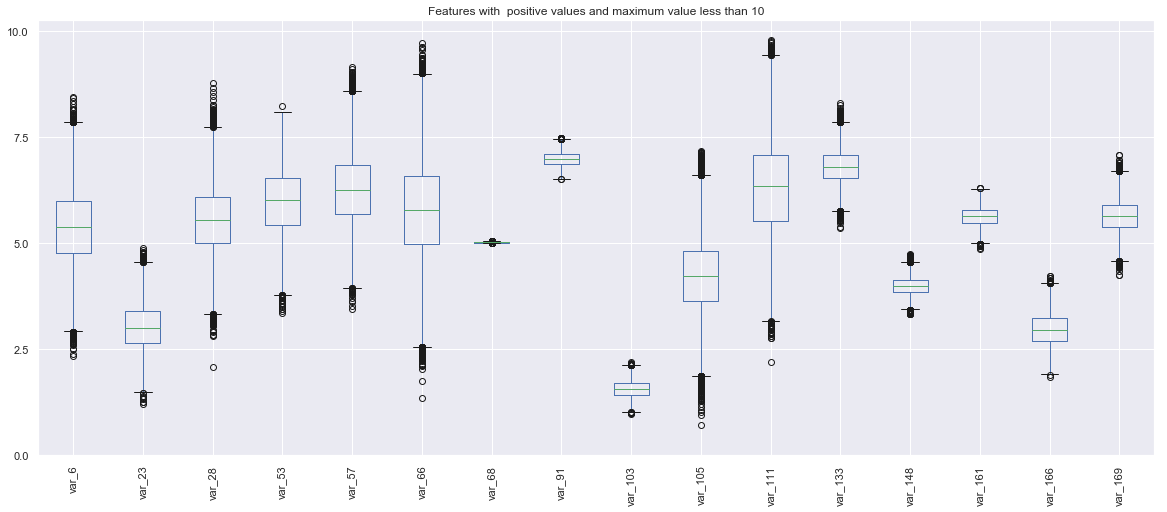

In [11]:
sns.set(rc={'figure.figsize':(20,8)})
setpositive=train_data.loc[:,colzerototen].boxplot(rot=90)
setpositive=setpositive.set(yticks=[0,2.5,5,7.5,10],title="Features with  positive values and maximum value less than 10")

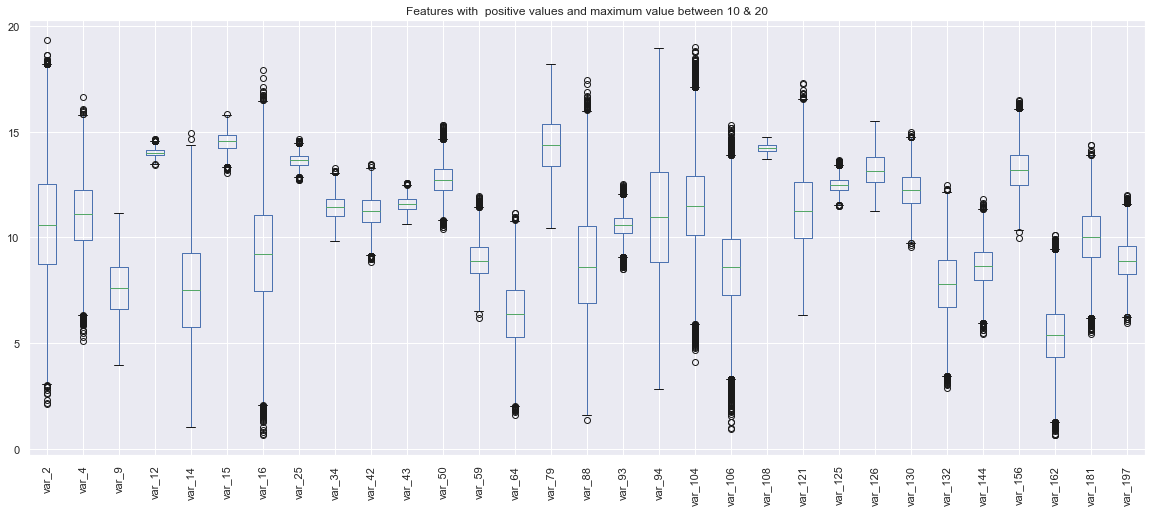

In [12]:
sns.set(rc={'figure.figsize':(20,8)})
setpositive20=train_data.loc[:,colzerototwenty].boxplot(rot=90)
setpositive20=setpositive20.set(yticks=[0,5,10,15,20],title="Features with  positive values and maximum value between 10 & 20")

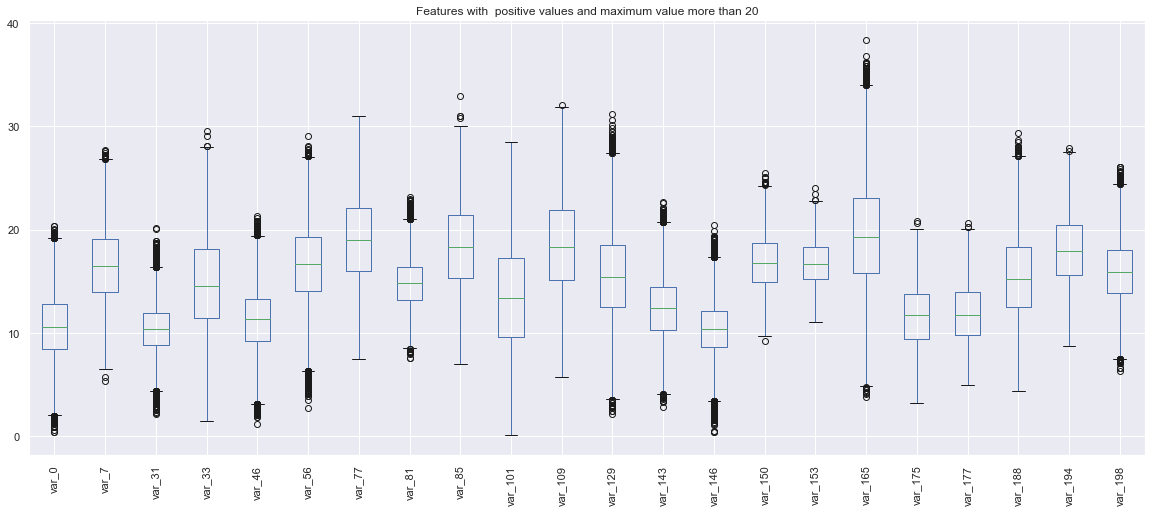

In [13]:
sns.set(rc={'figure.figsize':(20,8)})
setpositive20plus=train_data.loc[:,colzeroandtwentyplus].boxplot(rot=90)
setpositive20plus=setpositive20plus.set(yticks=[0,10,20,30,40],title="Features with  positive values and maximum value more than 20")

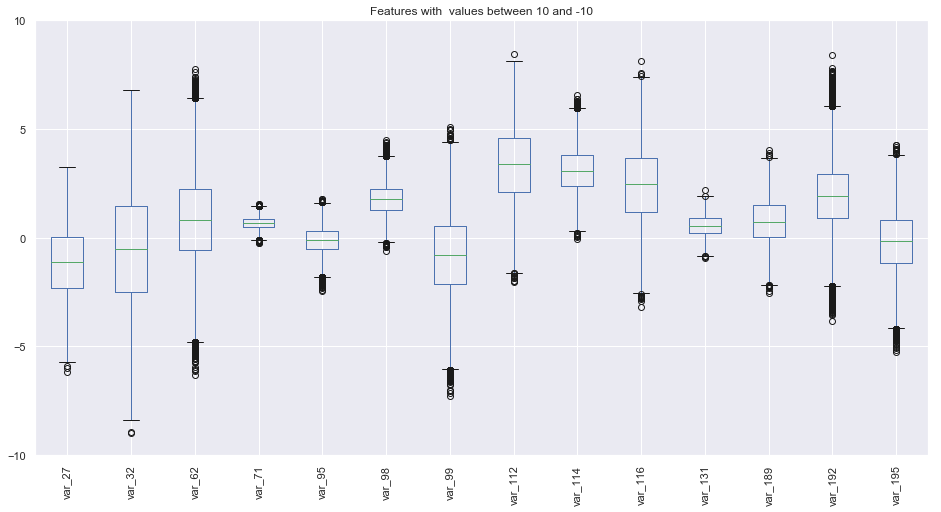

In [14]:
sns.set(rc={'figure.figsize':(16,8)})
setplustenminusten = train_data.loc[:,colplustenminusten].boxplot(rot=90)
setplustenminusten = setplustenminusten.set(yticks=[-10,-5,0,5,10],title="Features with  values between 10 and -10")

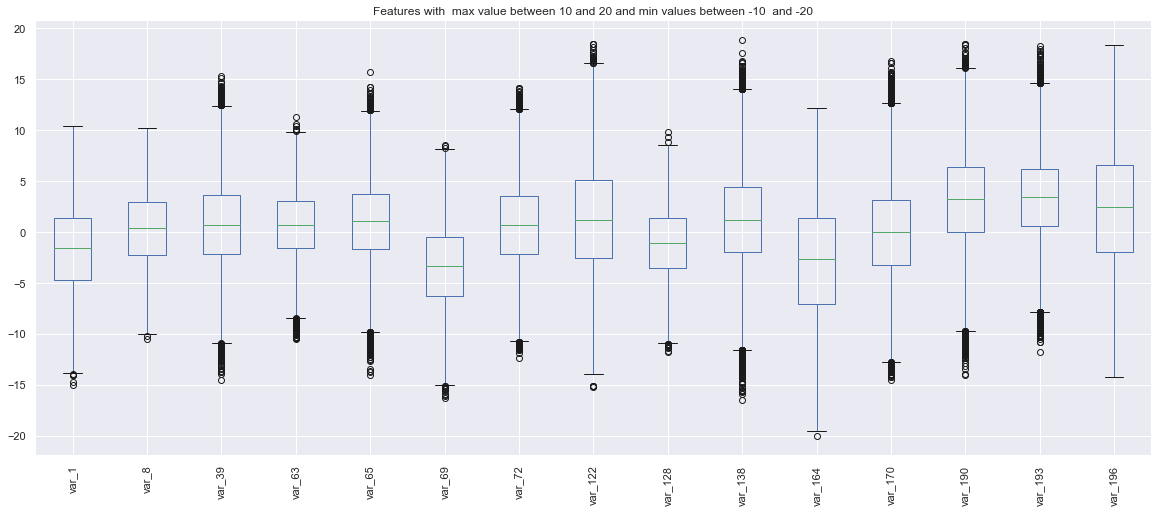

In [15]:
sns.set(rc={'figure.figsize':(20,8)})
setplustwentyminustwenty=train_data.loc[:,colplustwentyminustwenty].boxplot(rot=90)
setplustwentyminustwenty=setplustwentyminustwenty.set(yticks=[-20,-15,-10,-5,0,5,10,15,20],title="Features with  max value between 10 and 20 and min values between -10  and -20")

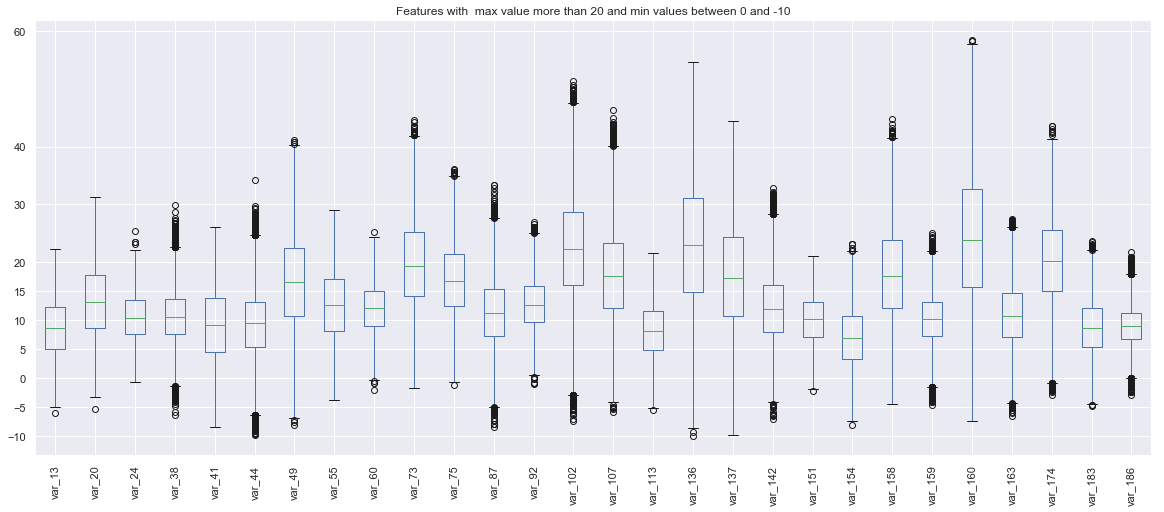

In [16]:
sns.set(rc={'figure.figsize':(20,8)})
setplustwentymoreminusten=train_data.loc[:,colplustwentymoreminusten].boxplot(rot=90)
setplustwentymoreminusten=setplustwentymoreminusten.set(yticks=[-10,-5,0,5,10,15,20,30,40,60],title="Features with  max value more than 20 and min values between 0 and -10")

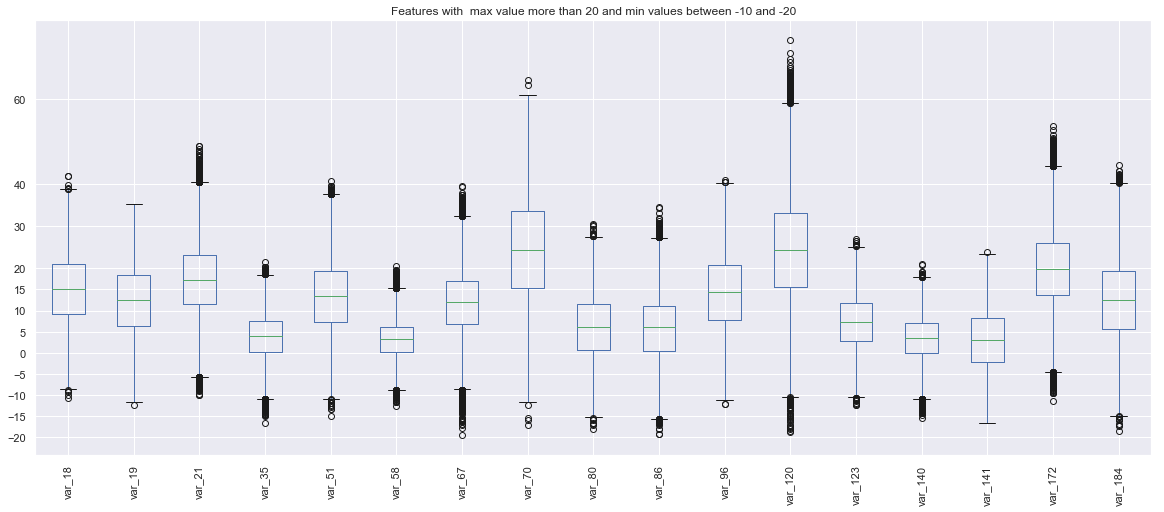

In [17]:
sns.set(rc={'figure.figsize':(20,8)})
setplustwentymoreminustwenty=train_data.loc[:,colplustwentymoreminustwenty].boxplot(rot=90)
setplustwentymoreminustwenty=setplustwentymoreminustwenty.set(yticks=[-20,-15,-10,-5,0,5,10,15,20,30,40,60],title="Features with  max value more than 20 and min values between -10 and -20")

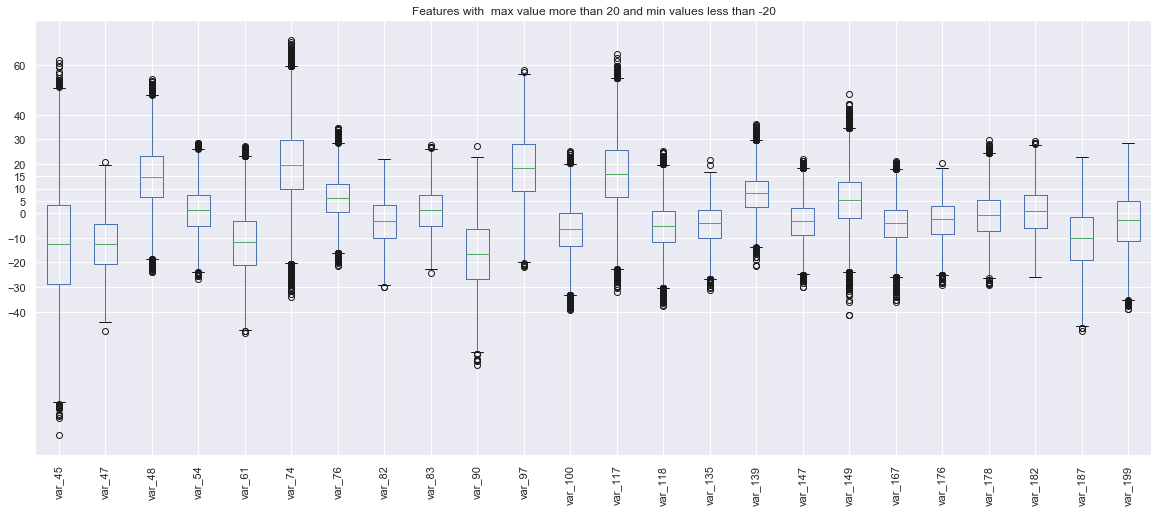

In [18]:
sns.set(rc={'figure.figsize':(20,8)})
setplustwentymoreminustwentymore=train_data.loc[:,colplustwentymoreminustwentymore].boxplot(rot=90)
setplustwentymoreminustwentymore=setplustwentymoreminustwentymore.set(yticks=[-40,-30,-20,-10,0,5,10,15,20,30,40,60],title="Features with  max value more than 20 and min values less than -20")

In [20]:
train_corr = train_data.iloc[:,2:].corr()
train_corr.head()

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
var_0,1.000000,-0.000544,0.006573,0.003801,0.001326,0.003046,0.006983,0.002429,0.004962,-0.002613,...,0.002752,0.000206,-0.005373,0.001616,-0.001514,0.002073,0.004386,-0.000753,-0.005776,0.003850
var_1,-0.000544,1.000000,0.003980,0.000010,0.000303,-0.000902,0.003258,0.001511,0.004098,-0.000832,...,0.006627,0.003621,-0.002604,0.001153,-0.002557,-0.000785,-0.000377,-0.004157,-0.004861,0.002287
var_2,0.006573,0.003980,1.000000,0.001001,0.000723,0.001569,0.000883,-0.000991,0.002648,-0.001932,...,0.000197,0.001285,-0.003400,0.000549,0.002104,-0.001070,0.003952,0.001078,-0.000877,0.003855
var_3,0.003801,0.000010,0.001001,1.000000,-0.000322,0.003253,-0.000774,0.002500,0.003553,-0.000826,...,0.000151,0.002445,-0.001530,-0.001699,-0.001054,0.001206,-0.002800,0.001164,-0.001651,0.000506
var_4,0.001326,0.000303,0.000723,-0.000322,1.000000,-0.001368,0.000049,0.004549,0.001194,-0.000918,...,0.001514,0.004357,0.003347,0.000813,-0.000068,0.003706,0.000513,-0.000046,-0.001821,-0.000786


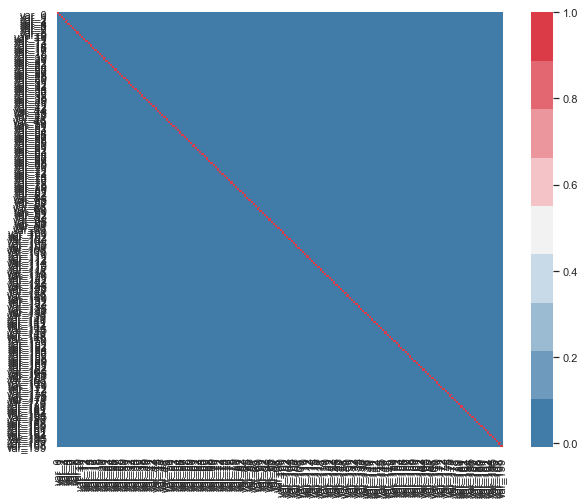

In [24]:
sns.set(rc={'figure.figsize':(10,8)})
sns.heatmap(train_corr,xticklabels=train_corr.columns,yticklabels=train_corr.columns,cmap=sns.diverging_palette(240, 10, n=9))

In [ ]:
#no correlation between features